<a href="https://colab.research.google.com/github/Nymisha-ruby/Experiments/blob/main/Premium_payment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
tr_data = pd.read_csv('/content/drive/MyDrive/Premium Payment Prediction/train_premium.csv')

In [4]:
tr_data.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.33,3,A,Urban,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,0


In [6]:
tr_data.shape

(79853, 12)

In [7]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [8]:
tr_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [9]:
#Converting Age in Days to Age in Years
tr_data['age_in_days']=tr_data['age_in_days']//365

In [10]:
tr_data = tr_data.rename({'age_in_days':'age'},axis='columns')
tr_data.head()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,33,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,59,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,48,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,42,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,86,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [11]:
tr_data.nunique()

id                                  79853
perc_premium_paid_by_cash_credit     1001
age                                    82
Income                              24165
Count_3-6_months_late                  14
Count_6-12_months_late                 17
Count_more_than_12_months_late         10
application_underwriting_score        672
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
target                                  2
dtype: int64

In [13]:
tr_data['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1ef08ebe90>,
 [Text(-1.078803086747592, 0.21490439740467726, ''),
  Text(1.0788030917777922, -0.21490437215346894, '')])

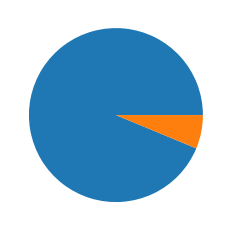

In [17]:
plt.pie(tr_data['target'].value_counts())

In [15]:
tr_data.corr()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005183,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259133,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age,0.005183,-0.259133,1.000000,0.029308,-0.058364,-0.072731,-0.059409,0.049883,0.176544,0.095100
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058364,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059409,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049883,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095100,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


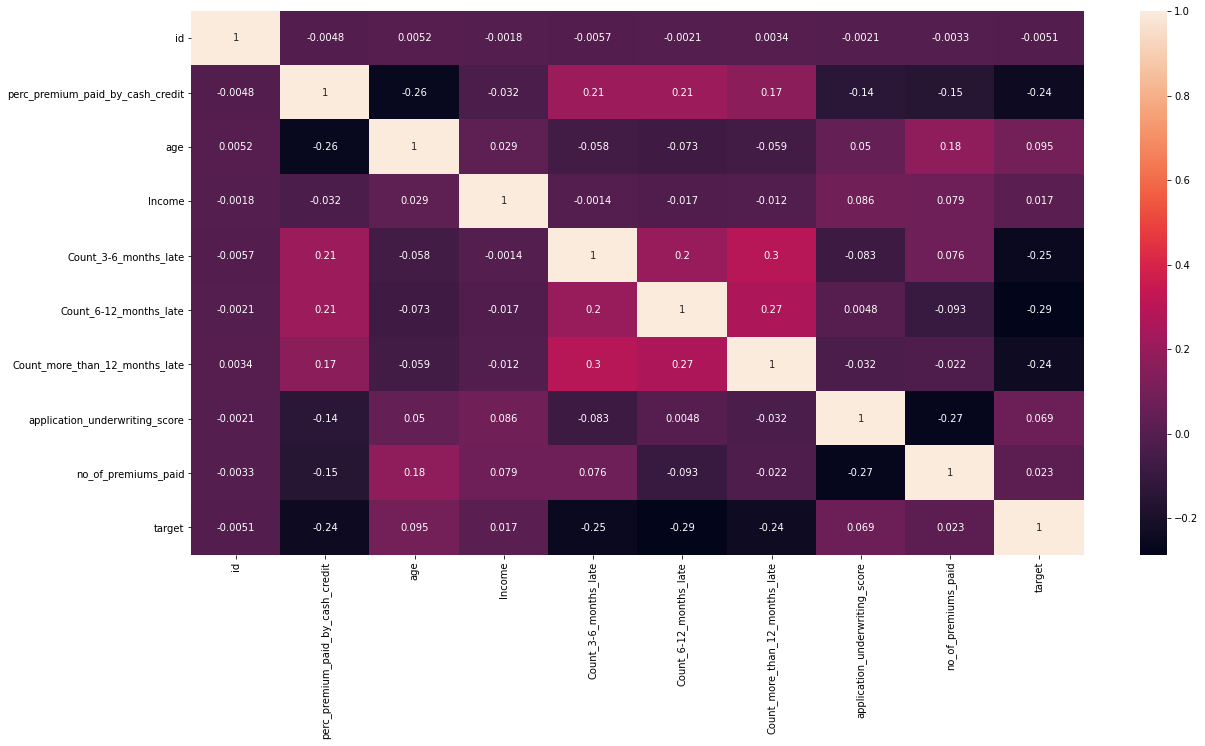

In [16]:
corr = tr_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)